In [1]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

In [4]:
predictors = load_data('pred_baseline_ilt.csv')
list(predictors)

['enso',
 'trop',
 'solar',
 'qboA',
 'qboB',
 'aod',
 'linear_pre',
 'linear_post',
 'pre_const',
 'post_const',
 'gap_cons']

In [13]:
uccle =   pd.read_csv('/home/poyraden/MLR_Uccle/Files/1km_monthlymean_all_divided.csv')
#uccle_des['date'] =  pd.to_datetime(uccle_des['date'],
                             # format='%Y-%m')
#uccle_des.set_index('date', inplace=True)
uccle

,date,0km,1km,2km,3km,4km,5km,6km,7km,8km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
0,1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1,1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
2,1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
3,1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
4,1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965
5,1969-06-01,1.661,2.390,3.583,3.797,3.603,3.339,2.984,2.477,2.609,...,-0.002149,0.003326,0.051234,0.078168,0.113462,0.133000,0.141586,0.193327,0.186884,0.247376
6,1969-07-01,1.949,3.318,4.003,3.954,3.261,3.229,2.818,2.855,3.273,...,0.040038,0.024378,0.023267,-0.015241,-0.000063,-0.002592,-0.012202,0.007112,0.024068,0.026530
7,1969-08-01,2.118,3.415,3.730,3.356,3.114,2.910,2.898,2.173,2.051,...,0.064424,0.052921,0.027406,0.031864,0.059729,0.083590,0.129085,0.155546,0.146483,0.135923
8,1969-09-01,-9999.000,3.735,3.701,3.793,3.482,3.193,2.807,2.298,2.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1969-10-01,-9999.000,2.760,2.383,2.861,2.782,2.398,2.005,1.724,1.480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
uccle

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
date,,,,,,,,,,,,,,,,,,,,,
1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,2.618,...,0.176023,0.150776,0.143983,0.164397,0.279994,0.490394,0.616999,0.726390,0.684176,NaN
1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,5.592,...,0.134114,0.164925,0.228390,0.269485,0.244483,0.311861,0.397392,0.462365,0.463972,0.441237
1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,2.819,...,-0.006758,-0.002138,-0.035659,-0.016093,0.018245,0.051473,0.096090,0.156548,0.142154,0.249384
1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,1.599,...,0.012754,0.016034,0.031780,0.041640,0.068683,0.043845,0.035349,0.064540,0.088078,0.100840
1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,5.461,...,0.013661,0.030910,0.054326,0.065788,0.077930,0.091798,0.147521,0.177979,0.242554,0.211965
1969-06-01,1.661,2.390,3.583,3.797,3.603,3.339,2.984,2.477,2.609,2.851,...,-0.002149,0.003326,0.051234,0.078168,0.113462,0.133000,0.141586,0.193327,0.186884,0.247376
1969-07-01,1.949,3.318,4.003,3.954,3.261,3.229,2.818,2.855,3.273,4.224,...,0.040038,0.024378,0.023267,-0.015241,-0.000063,-0.002592,-0.012202,0.007112,0.024068,0.026530
1969-08-01,2.118,3.415,3.730,3.356,3.114,2.910,2.898,2.173,2.051,2.513,...,0.064424,0.052921,0.027406,0.031864,0.059729,0.083590,0.129085,0.155546,0.146483,0.135923
1969-09-01,-9999.000,3.735,3.701,3.793,3.482,3.193,2.807,2.298,2.019,1.706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
uccle_time = uccle.loc['1977-02-01':'2017-06-01']
#uccle_time['5km'][uccle['5km']>0]

In [24]:
predictors, uccle_time = pd.DataFrame.align(predictors, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values
print('X', len(X))

# (nsamples) array of observations
Y = uccle_time['5km_ds'].values
print('Y',len(Y))

regression_output = mzm_regression(X, Y)

X 485
Y 485


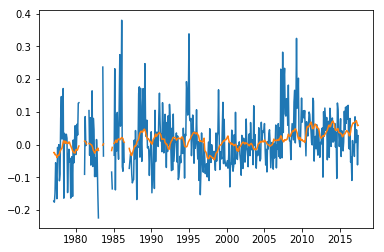

In [26]:
plt.plot(uccle_time.index, uccle_time['5km_ds'])
plt.plot(uccle_time.index, regression_output['fit_values'])



In [28]:
regression_output['gls_results'].params

array([-0.01088449,  0.00144178,  0.00444706, -0.00251143, -0.00911027,
        0.00035418,  0.02131127,  0.04352873,  0.02971038, -0.01018614,
       -0.01363635])

In [29]:
regression_output['fit_values']

array([-0.02441644, -0.02417531, -0.03088981, -0.03028342, -0.03267476,
       -0.03934979, -0.03493824, -0.03263495, -0.03300283, -0.02812897,
       -0.02066676, -0.01641437, -0.01291759, -0.01191347, -0.0012149 ,
        0.00759209,  0.01164269,  0.0096711 ,  0.00389823,  0.01015513,
        0.00531485,  0.00422111,  0.00453746,  0.00357909,  0.00806824,
        0.00730237,  0.00094396, -0.00372144, -0.00894139, -0.01327301,
       -0.01912023, -0.02137885, -0.024898  , -0.02435137, -0.02608002,
       -0.01638436, -0.01475885, -0.01789515, -0.01504585, -0.00891554,
       -0.00414502,         nan,  0.0060492 ,         nan,         nan,
        0.01309562,         nan,         nan,         nan,  0.01069741,
        0.01004179,  0.00647385,  0.0015636 ,         nan,         nan,
               nan,  0.00334718,  0.00350026,  0.00171576, -0.00020371,
       -0.00056643, -0.00424336, -0.01033458, -0.01821199, -0.02155362,
       -0.02632021, -0.02196413, -0.01616195, -0.01501598, -0.01